In [ ]:
pip install pandas matplotlib seaborn


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/Fashion_Retail_Sales.csv')

In [ ]:
print(df.head())

   Customer Reference ID Item Purchased  Purchase Amount (USD) Date Purchase  \
0                   4018        Handbag                 4619.0    05-02-2023   
1                   4115          Tunic                 2456.0    11-07-2023   
2                   4019       Tank Top                 2102.0    23-03-2023   
3                   4097       Leggings                 3126.0    15-03-2023   
4                   3997         Wallet                 3003.0    27-11-2022   

   Review Rating Payment Method  
0            NaN    Credit Card  
1            2.0    Credit Card  
2            4.1           Cash  
3            3.2           Cash  
4            4.7           Cash  


In [ ]:
print(df.info)

<bound method DataFrame.info of       Customer Reference ID Item Purchased  Purchase Amount (USD)  \
0                      4018        Handbag                 4619.0   
1                      4115          Tunic                 2456.0   
2                      4019       Tank Top                 2102.0   
3                      4097       Leggings                 3126.0   
4                      3997         Wallet                 3003.0   
...                     ...            ...                    ...   
3395                   4118         Shorts                   37.0   
3396                   4056       Slippers                  176.0   
3397                   3991         Onesie                    NaN   
3398                   4042        Sandals                  128.0   
3399                   4001       Backpack                  115.0   

     Date Purchase  Review Rating Payment Method  
0       05-02-2023            NaN    Credit Card  
1       11-07-2023            2.0    

In [ ]:
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'], format='%d-%m-%Y', errors='coerce')

In [ ]:
print(df.isnull().sum())

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64


In [ ]:
df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].fillna(df['Purchase Amount (USD)'].mean())
df['Review Rating'] = df['Review Rating'].fillna(df['Review Rating'].median())

Item Purchased
Tunic      18371.968727
Pajamas    15932.196364
Shorts     14739.227636
Handbag    14705.227636
Jeans      14635.098182
Boots      13928.227636
Belt       13774.906182
Loafers    13512.357091
Poncho     13459.227636
Gloves     13426.968727
Name: Purchase Amount (USD), dtype: float64


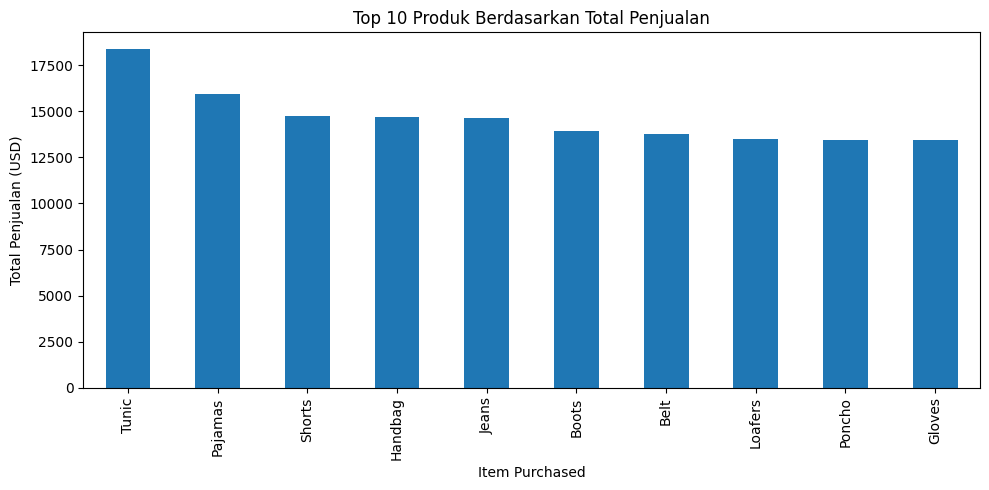

In [ ]:
top_items = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(10)
print(top_items)

top_items.plot(kind='bar', title='Top 10 Produk Berdasarkan Total Penjualan', figsize=(10,5))
plt.ylabel('Total Penjualan (USD)')
plt.tight_layout()
plt.show()

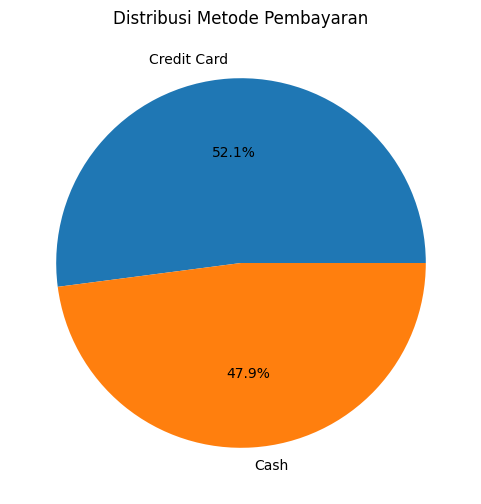

In [ ]:
payment_counts = df['Payment Method'].value_counts()
payment_counts.plot(kind='pie', autopct='%1.1f%%', title='Distribusi Metode Pembayaran', figsize=(6,6))
plt.ylabel('')
plt.show()

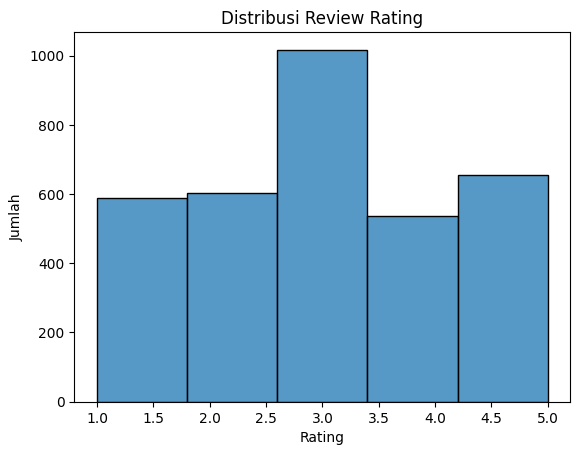

In [ ]:
sns.histplot(df['Review Rating'], bins=5, kde=False)
plt.title('Distribusi Review Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

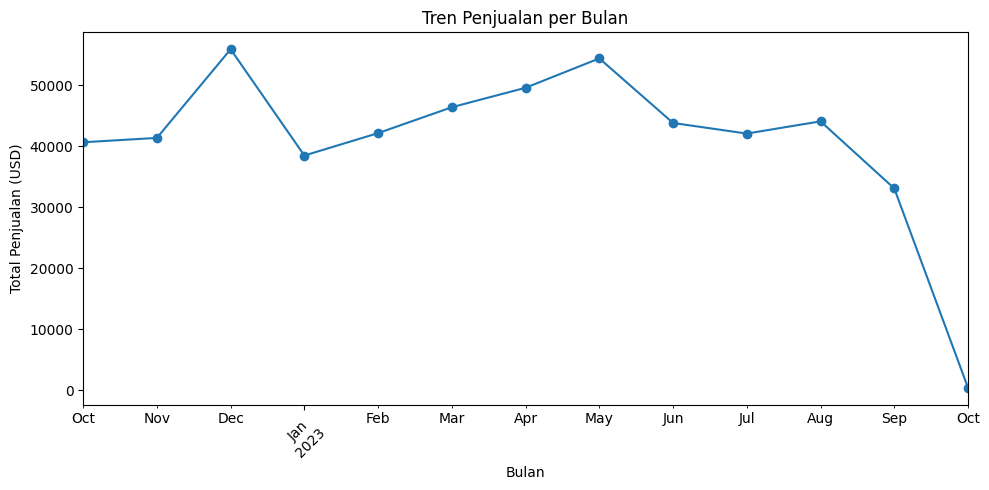

In [ ]:
df['Month'] = df['Date Purchase'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Purchase Amount (USD)'].sum()
monthly_sales.plot(kind='line', marker='o', title='Tren Penjualan per Bulan', figsize=(10,5))
plt.ylabel('Total Penjualan (USD)')
plt.xlabel('Bulan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'df_cleaned' is not defined